In [26]:
import osmnx as ox
import geopandas as gpd

In [15]:
# or optionally buffer them
places = [
    "Cambridgeshire, UK",
    "City of Peterborough, UK",
    "Norfolk, UK",
    "Suffolk, UK",
    "Essex, UK",
    "Thurrock, UK",
    "Hertfordshire, UK",
    "Central Bedfordshire, UK",
    "Bedford, UK"
]
gdf = ox.geocode_to_gdf(places, buffer_dist=500)

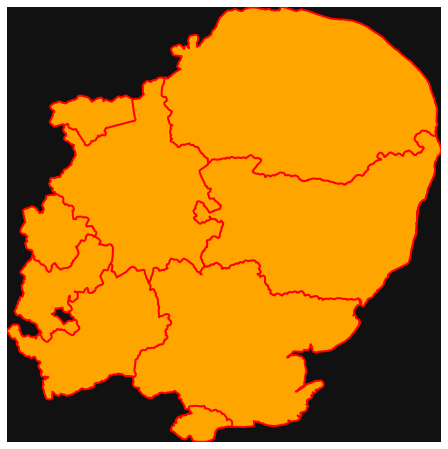

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [24]:
ox.plot_footprints(gdf, edge_linewidth=2, edge_color='red')

<AxesSubplot:>

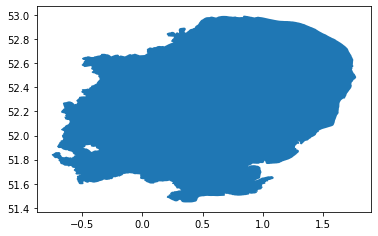

In [29]:
gpd.GeoSeries(gdf["geometry"].unary_union).plot()

In [31]:
EE_geom = gdf["geometry"].unary_union

In [39]:
from utils.utils import *

In [42]:
split_geom = ox.utils_geo._quadrat_cut_geometry(EE_geom, quadrat_width=metres_to_dist(10000))

In [57]:
split_geom_gdf = gpd.GeoDataFrame({"geometry": split_geom}, crs=gdf.crs)

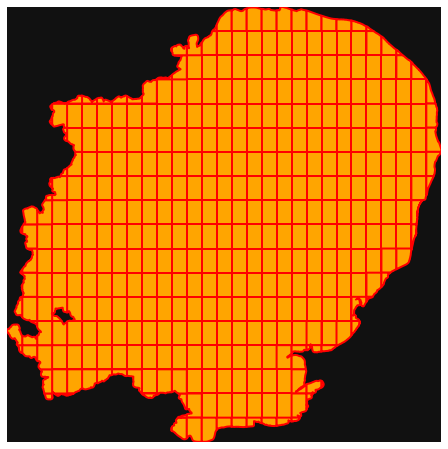

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [58]:
ox.plot_footprints(split_geom_gdf, edge_linewidth=2, edge_color='red')

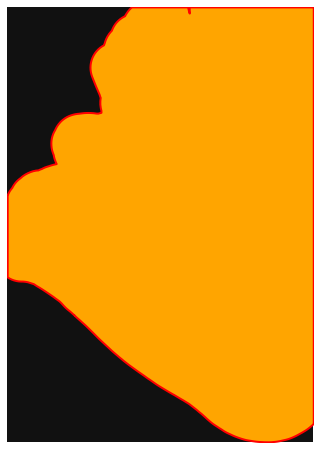

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [64]:
ox.plot_footprints(split_geom_gdf.iloc[1:2], edge_linewidth=2, edge_color='red')

In [76]:
split_geom_gdf["geometry"][1].boundary

shapely.geometry.linestring.LineString

In [ ]:
#TODO: test contains_points thing